In [68]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import itertools
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from os.path import join, exists, isfile, isdir
from os import makedirs, listdir

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [70]:
#datasets = ["breast", "ads", "adult", "farm", "mnist17", "mnist49", "mnist56"]
datasets = ["ads"]
#experiments = ["baseline", "greedy_kernel", "landmarks_based"]
experiments = ["greedy_kernel"]

### Loading results

In [71]:
results_path = join(".", "results")
output_path = join(".", "results", "fig")
if not(exists(output_path)): makedirs(output_path)

In [72]:
def load_dir_results(dir_path):
    dir_results = []
    for f in [f for f in listdir(dir_path) if (isfile(join(dir_path, f)) and f.endswith(".pkl"))]:
        with open(join(dir_path, f), 'rb') as in_file:
            dir_results += pickle.load(in_file)
                
    for d in [d for d in listdir(dir_path) if isdir(join(dir_path, d))]:
        dir_results += load_dir_results(join(dir_path, d))
    
    return dir_results

def load_results(results_path):
    # Loading
    results = []
    for exp in set(listdir(results_path)).intersection(experiments):
        results += load_dir_results(join(results_path, exp))
    results = pd.DataFrame(results)
    return results

In [73]:
results_file = join(output_path, "results.pkl")
if not exists(results_file):
    results = load_results(results_path)
    with open(results_file, 'wb') as out_file:
        pickle.dump(results, out_file)
        
with open(results_file, 'rb') as in_file:
    results = pickle.load(in_file)
results = load_results(results_path)
results_per_dataset = {d:results.loc[results.dataset == d] for d in datasets}

results_per_dataset

{'ads':   dataset     exp   algo            C     D      N  gamma  beta  \
 0     ads  greedy  PBRFF  8435.212184     1  20000  0.001    10   
 1     ads  greedy  PBRFF  1949.987164    10  20000  0.001    10   
 2     ads  greedy  PBRFF  1063.386154    25  20000  0.001    10   
 3     ads  greedy  PBRFF  8169.477253    50  20000  0.001    10   
 4     ads  greedy  PBRFF  7669.229587   100  20000  0.001    10   
 5     ads  greedy  PBRFF  7536.582118   250  20000  0.001    10   
 6     ads  greedy  PBRFF  2746.422322   350  20000  0.001    10   
 7     ads  greedy  PBRFF  8905.150834   500  20000  0.001    10   
 8     ads  greedy  PBRFF  6121.858744   750  20000  0.001    10   
 9     ads  greedy  PBRFF  2460.238325  1000  20000  0.001    10   
 
                                               Loss_l  \
 0                            [[0.22744549351873092]]   
 1  [[0.22569479615464091, 0.22577406462050578, 0....   
 2  [[0.22293979139281303, 0.2255924965397216, 0.2...   
 3  [[0.2264636

In [74]:
r = results_per_dataset[datasets[0]]
r

,dataset,exp,algo,C,D,N,gamma,beta,Loss_l,E_l,nbrD_choisi,maxTry,p,epsilon,train_error,val_error,test_error,f1,time
0,ads,greedy,PBRFF,8435.212184,1,20000,0.001,10,[[0.22744549351873092]],[0.00046362772532406344],1,6,19,0.000017,0.127097,0.144309,0.168293,0.908123,"[(sampling, 502.6671886444092), (loss, 2225.31..."
1,ads,greedy,PBRFF,1949.987164,10,20000,0.001,10,"[[0.22569479615464091, 0.22577406462050578, 0....",[0.0003871067479504232],10,2,20,0.000028,0.102694,0.126016,0.136585,0.923497,"[(sampling, 502.6671886444092), (loss, 2225.31..."
2,ads,greedy,PBRFF,1063.386154,25,20000,0.001,10,"[[0.22293979139281303, 0.2255924965397216, 0.2...","[0.00017823930556671599, 0.00018968332576376815]",25,7,13,0.000055,0.070666,0.079268,0.097561,0.944444,"[(sampling, 502.6671886444092), (loss, 2225.31..."
3,ads,greedy,PBRFF,8169.477253,50,20000,0.001,10,"[[0.2264636586801411, 0.2264863804606431, 0.22...","[0.00021862239197906945, 0.0002189877525219784...",50,5,16,0.000012,0.038129,0.073171,0.068293,0.959943,"[(sampling, 502.6671886444092), (loss, 2225.31..."
4,ads,greedy,PBRFF,7669.229587,100,20000,0.001,10,"[[0.22660133095932308, 0.2258474592199365, 0.2...","[9.582462057238533e-05, 9.593586862004823e-05,...",100,5,7,0.000086,0.035587,0.067073,0.062195,0.961969,"[(sampling, 502.6671886444092), (loss, 2225.31..."
5,ads,greedy,PBRFF,7536.582118,250,20000,0.001,10,"[[0.225019175006367, 0.2273786483631439, 0.225...","[5.4771314136530456e-05, 5.492722986808872e-05...",250,8,4,0.000049,0.011185,0.050813,0.042683,0.974582,"[(sampling, 502.6671886444092), (loss, 2225.31..."
6,ads,greedy,PBRFF,2746.422322,350,20000,0.001,10,"[[0.22676835170051854, 0.22673335905733313, 0....","[0.00024622607073381816, 0.0002462758176245978...",350,10,18,0.000011,0.013726,0.036585,0.039024,0.976744,"[(sampling, 502.6671886444092), (loss, 2225.31..."
7,ads,greedy,PBRFF,8905.150834,500,20000,0.001,10,"[[0.2264060077103692, 0.2225630094236196, 0.22...","[0.00027404679784621093, 0.0002737089852601597...",500,3,20,0.000116,0.010676,0.036585,0.034146,0.979562,"[(sampling, 502.6671886444092), (loss, 2225.31..."
8,ads,greedy,PBRFF,6121.858744,750,20000,0.001,10,"[[0.2260924955790136, 0.22839656246364573, 0.2...","[0.0002189468935061178, 0.00021926927036318506...",750,6,16,0.000172,0.010168,0.036585,0.031707,0.980994,"[(sampling, 502.6671886444092), (loss, 2225.31..."
9,ads,greedy,PBRFF,2460.238325,1000,20000,0.001,10,"[[0.2249528473266956, 0.22487503994521682, 0.2...","[0.0002464903626684167, 0.0002463298817600733,...",1000,6,18,0.000047,0.009659,0.038618,0.032927,0.980306,"[(sampling, 502.6671886444092), (loss, 2225.31..."


# Greedy Kernel Learning

In [75]:
# for d in datasets:
#     print(d)
#     r = results_per_dataset[d]
#     print(r)
#     with open("/Users/jacobcomeau/Desktop/resultat_PBRFF_TEST_GREEDY.pkl", 'wb') as out_file:
#         pickle.dump(results, out_file)


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
ads


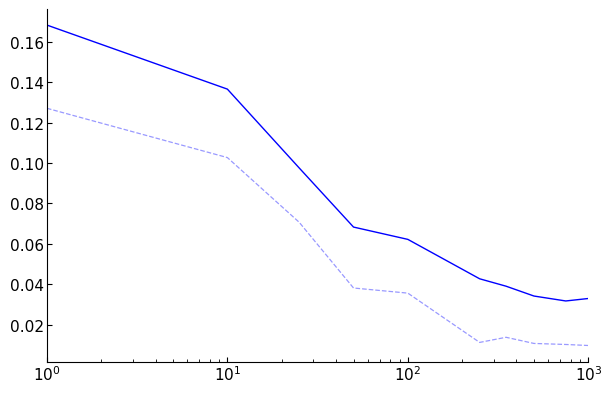

In [76]:
N = 20000
max_D = 5000

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)
for d in datasets:
    print(d)
    r = results_per_dataset[d]

    # # SVM
    # svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    # plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1, label="SVM RBF")

    # # RFF
    # r_rff = r.loc[r.algo == 'RFF'].loc[r.D <= max_D].set_index('D')
    # plt.semilogx(r_rff['train_error'], "--", label=f"RFF-train",color ='g', linewidth=0.9, alpha=0.4)
    # plt.semilogx(r_rff['test_error'], "-", label=f"RFF-test", color ='g', linewidth=1.1)
    
    # # Optimized Kernel RFF
    # r_okrff = r.loc[r.algo == 'OKRFF'].loc[r.D <= max_D]
    # r_okrff = r.loc[r_okrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    # plt.semilogx(r_okrff['train_error'], "--", label=f"OKRFF-train", color ='y', linewidth=0.9,alpha=0.4)
    # plt.semilogx(r_okrff['test_error'], "-", label=f"OKRFF-test", color ='y', linewidth=1)
    
    # PAC-Bayes RFF
    r_pbrff = r.loc[r.algo == 'PBRFF'].loc[r.D <= max_D].sort_values('beta', ascending=False)
    r_pbrff = r.loc[r_pbrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_pbrff['train_error'], "--", label=f"PBRFF-train", color ='b', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_pbrff['test_error'], "-", label=f"PBRFF-test", color ='b', linewidth=1)
    
    sns.despine(top=True, right=True)
    if d in ["mnist49", "mnist17"]:
        leg = plt.legend(frameon=True, fontsize='x-large')
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=1.3)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    tick_params(axis='both', which='both', pad=2, direction='in', labelsize=11)
    plt.savefig(join(output_path, f"error_vs_features_{d}.pdf"))
    plt.show()

# Landmarks-Based Learning

####  Test error of the landmarks-based approach

In [77]:
# landmarks_method = 'clustering'
# perc_landmarks = 0.1
# beta = 1
# D = 64

# ### SVM ###
# svm_results = pd.DataFrame(results.loc[results.algo == 'SVM'].set_index('dataset')['test_error'])\
#                                                              .rename(columns={'test_error': 'svm'})

# ### RBF ###
# rbf_results = pd.DataFrame(results.loc[(results.algo == 'RBF') & \
#                                        (results.perc_landmarks == perc_landmarks) & \
#                                        (results.method == landmarks_method)] \
#                                        .set_index('dataset')['test_error']) \
#                                        .rename(columns={'test_error': 'rbf'})

# ### PAC-Bayes ###
# pb_results = results.loc[(results.algo == 'PB') & (results.perc_landmarks == perc_landmarks) & \
#                          (results.method == landmarks_method)].sort_values('beta', ascending=True)

# # beta and D optimized on validation set

# pb_results_optimized = pd.DataFrame(pb_results.loc[pb_results.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                                   .rename(columns={'test_error': 'pb'})

# # beta fixed, D optimized on validation set
# pb_results_beta = pb_results.loc[pb_results.beta == beta]
# pb_results_beta = pd.DataFrame(pb_results_beta.loc[pb_results_beta.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error'])\
#                                                   .rename(columns={'test_error': 'pb_beta'})

# # beta optimized on validation set, D fixed
# pb_results_D = pb_results.loc[pb_results.D == D]
# pb_results_D = pd.DataFrame(pb_results_D.loc[pb_results_D.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                             ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                             .rename(columns={'test_error': 'pb_D'})


# table = svm_results.join(rbf_results).join(pb_results_optimized).join(pb_results_beta).join(pb_results_D)
# table = (100*table).round(2).sort_index()
# print(table.to_latex())

#### Behavior of the Landmarks-based approach according to the percentage of training points selected as landmarks

In [78]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (7, 5)
# for d in datasets:
#     print(f"Dataset: {d}")
#     r = results_per_dataset[d]
    
#     ### SVM ###
#     svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
#     plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
#     ### RBF ###
#     r_rbf = r.loc[r.algo == 'RBF'].sort_values('perc_landmarks')
#     for method in r_rbf.method.unique():
#         plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
#                  color = 'g',
#                  linewidth=1)
        
#     ### PAC-Bayes ###
#     r_pb = r.loc[r.algo == 'PB'].sort_values('perc_landmarks', ascending=False).sort_values('beta', ascending=True)

#     # Selecting beta and D based on error on the validation set
#     r_pb = r_pb.loc[r_pb.groupby(['method', 'perc_landmarks'])["val_error"].idxmin()]
#     for method in r_pb.method.unique():
#         plt.plot(r_pb.loc[r_pb.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
#                  color = 'b',
#                  linewidth = 1)

#     plt.xlabel("Percentage of landmarks", fontsize=14)
#     plt.ylabel("Misclassification error", fontsize=14)
#     sns.despine(top=True, right=True)
#     plt.tight_layout()
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
#     if d == "farm":
#         plt.legend(frameon=True, fontsize='large')
#     elif d == "ads":
#         plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
#     plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
#     plt.show()